# Installing Neccessary Libraries

In [1]:
# installing pytorch as it is neccessary to run easyOCR.
!pip3 install torch torchvision torchaudi
# Easy Optical Character Recognition for extracting text from images..
!pip install easyocr

ERROR: Could not find a version that satisfies the requirement torchaudi (from versions: none)
ERROR: No matching distribution found for torchaudi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  U

# Importing Neccessary Libraries...

In [3]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization
import numpy as np  # NumPy for numerical operations
import easyocr  # EasyOCR for text extraction from images

# Reading Image

In [4]:
# Path of Image of which the text is being extracted
IMAGE_PATH = 'text.png'

In [5]:
# Reading the image
image = cv2.imread(IMAGE_PATH)

# Extracting Text Using Easy OCR From Image

In [6]:
# Initializing the EasyOCR reader with English language support and GPU disabled
reader = easyocr.Reader(['en'], gpu=False)

# Extracting text from the image
results = reader.readtext(IMAGE_PATH)

# Displaying the extracted results
for detection in results:
  print(detection)

([[252, 8], [398, 8], [398, 34], [252, 34]], 'WELCOME', 0.9972690694627296)
([[60, 18], [415, 18], [415, 117], [60, 117]], 'Cool Symbol', 0.9818497251303233)
([[101, 145], [170, 145], [170, 184], [101, 184]], "'text", 0.5247019614636144)
([[232, 132], [370, 132], [370, 164], [232, 164]], 'BLAOKPIVK', 0.6169628722222004)
([[527, 141], [591, 141], [591, 174], [527, 174]], 'Text"', 0.6278796465318808)
([[34, 166], [60, 166], [60, 190], [34, 190]], '=', 0.9471326709569929)
([[451, 221], [537, 221], [537, 262], [451, 262]], '"Da8<', 0.05394804973126237)
([[111, 256], [541, 256], [541, 348], [111, 348]], 'COOLSYMBOLTOP', 0.9442768866009189)
([[165.7811992150991, 184.6717988226486], [227.97619484611602, 171.32749850552847], [234.2188007849009, 206.3282011773514], [173.02380515388398, 220.67250149447153]], 'O.10', 0.5822179317474365)
([[46.42229123600033, 219.21114561800016], [171.51158229165753, 187.0845914772777], [179.57770876399965, 217.78885438199984], [54.48841770834246, 250.915408522722

# Drawing the Detecting Results on the Image

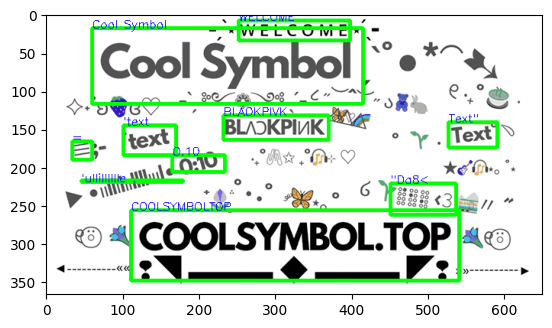

In [8]:
# Looping through each text detection result
for detection in results:
    bounding_box, text, confidence_level = detection
    # Extracting coordinates of the bounding box and text and converting the coordinate points to integer in case if float...
    top_left = tuple(map(int, bounding_box[0]))
    bottom_right = tuple(map(int, bounding_box[2]))

    # Setting font type
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Drawing rectangle around the detected text
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Putting the extracted text on the image
    cv2.putText(image, text, top_left, font, 0.5, (255, 0, 0), 1)

# Converting image to RGB for Matplotlib display as openCV reads the image in BGR (Blue, Green, Red)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Displaying the image with detected text
plt.imshow(image)